#### Documentation of spacy: https://spacy.io/api/doc

`spaCy is an open-source Python library that parse and understand large volumes of text. Separete models are available that create to specific language (English, French, German, etc)`

pip install spacy 

python -m spacy download en

language supported by spacy: https://spacy.io/usage/models#languages

In [1]:
import spacy

In [2]:
nlp = spacy.load(name="en_core_web_sm")

In [3]:
nlp.pipeline

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec at 0x19e18598050>),
 ('tagger', <spacy.pipeline.tagger.Tagger at 0x19e18598170>),
 ('parser', <spacy.pipeline.dep_parser.DependencyParser at 0x19e182fa570>),
 ('attribute_ruler',
  <spacy.pipeline.attributeruler.AttributeRuler at 0x19e185ec610>),
 ('lemmatizer', <spacy.lang.en.lemmatizer.EnglishLemmatizer at 0x19e185ee350>),
 ('ner', <spacy.pipeline.ner.EntityRecognizer at 0x19e182fa730>)]

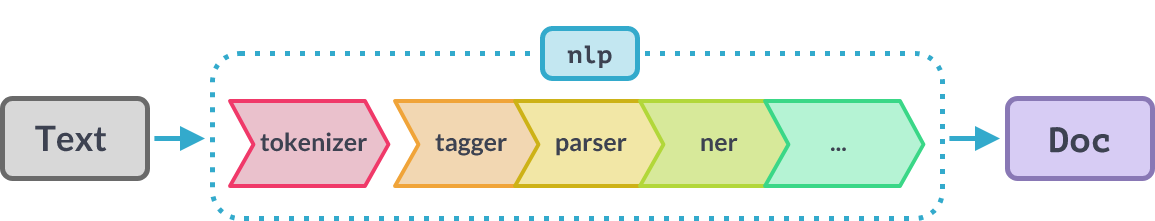

In [4]:
# This all the things apply on our text

nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [5]:
# Create a Doc object. Here used unicod string.

doc = nlp(text=u'Tesla is looking at buying U.S. startup for $6 million')

In [6]:
type(doc)

spacy.tokens.doc.Doc

In [7]:
# Print each token separately

for token in doc:
    print(token.text, "--->", token.pos_, "--->", token.dep_)

Tesla ---> PROPN ---> nsubj
is ---> AUX ---> aux
looking ---> VERB ---> ROOT
at ---> ADP ---> prep
buying ---> VERB ---> pcomp
U.S. ---> PROPN ---> compound
startup ---> NOUN ---> dobj
for ---> ADP ---> prep
$ ---> SYM ---> quantmod
6 ---> NUM ---> compound
million ---> NUM ---> pobj


This doesn't look very user-friendly, but right away we see some interesting things happen:
1. Tesla is recognized to be a Proper Noun, not just a word at the start of a sentence
2. U.S. is kept together as one entity (we call this a 'token')

As we dive deeper into spaCy we'll see what each of these abbreviations mean and how they're derived. We'll also see how spaCy can interpret the last three tokens combined `$6 million` as referring to ***money***.

### Tokenization

In [8]:
for token in doc:
    print(token.text)

Tesla
is
looking
at
buying
U.S.
startup
for
$
6
million


In [9]:
doc[0]

Tesla

In [10]:
doc2 = nlp(u"Tesla isn't   looking into startups anymore.")

for token in doc2:
    print(token.text, "--->",token.pos_,"--->", token.dep_)

Tesla ---> PROPN ---> nsubj
is ---> AUX ---> aux
n't ---> PART ---> neg
   ---> SPACE ---> dep
looking ---> VERB ---> ROOT
into ---> ADP ---> prep
startups ---> NOUN ---> pobj
anymore ---> ADV ---> advmod
. ---> PUNCT ---> punct


Notice how `isn't` has been split into two tokens. spaCy recognizes both the root verb `is` and the negation attached to it. Notice also that both the extended whitespace and the period at the end of the sentence are assigned their own tokens.

It's important to note that even though `doc2` contains processed information about each token, it also retains the original text:

In [11]:
doc2

Tesla isn't   looking into startups anymore.

## Part-of-Speech Tagging (POS)
The next step after splitting the text up into tokens is to assign parts of speech. In the above example, `Tesla` was recognized to be a ***proper noun***. Here some statistical modeling is required. For example, words that follow "the" are typically nouns.

For a full list of POS Tags visit https://spacy.io/usage/spacy-101#annotations-pos-deps

In [12]:
doc2[0].pos_

'PROPN'

In [13]:
# Dependencies

doc2[0].dep_

'nsubj'

### To see the full name of a tag use `spacy.explain(tag)`

In [14]:
spacy.explain('nsubj')

'nominal subject'

In [15]:
spacy.explain('PROPN')

'proper noun'

## Additional Token Attributes
We'll see these again in upcoming lectures. For now we just want to illustrate some of the other information that spaCy assigns to tokens:

|Tag|Description|doc2[0].tag|
|:------|:------:|:------|
|`.text`|The original word text<!-- .element: style="text-align:left;" -->|`Tesla`|
|`.lemma_`|The base form of the word|`tesla`|
|`.pos_`|The simple part-of-speech tag|`PROPN`/`proper noun`|
|`.tag_`|The detailed part-of-speech tag|`NNP`/`noun, proper singular`|
|`.shape_`|The word shape – capitalization, punctuation, digits|`Xxxxx`|
|`.is_alpha`|Is the token an alpha character?|`True`|
|`.is_stop`|Is the token part of a stop list, i.e. the most common words of the language?|`False`|

In [16]:
# Lemmas (the base form of the word):

print(doc2[4].text)

print(doc2[4].lemma_)

looking
look


In [17]:
# Simple Parts-of-Speech & Detailed Tags:

print(doc2[4].pos_)

print(doc2[4].tag_ + ' / ' + spacy.explain(doc2[4].tag_))

VERB
VBG / verb, gerund or present participle


In [18]:
# Word Shapes:

print(doc2[0].text + ': ' + doc2[0].shape_)
print(doc[5].text + ' : ' + doc[5].shape_)

Tesla: Xxxxx
U.S. : X.X.


In [19]:
# Boolean Values:

print(doc2[0].is_alpha)

print(doc2[0].is_stop)

True
False


___
## Spans
Large Doc objects can be hard to work with at times. A **span** is a slice of Doc object in the form `Doc[start:stop]`.

In [20]:
doc3 = nlp(text=u'Although commmonly attributed to John Lennon from his song "Beautiful Boy", \
the phrase "Life is what happens to us while we are making other plans" was written by \
cartoonist Allen Saunders and published in Reader\'s Digest in 1957, when Lennon was 17.')

In [21]:
doc3

Although commmonly attributed to John Lennon from his song "Beautiful Boy", the phrase "Life is what happens to us while we are making other plans" was written by cartoonist Allen Saunders and published in Reader's Digest in 1957, when Lennon was 17.

In [22]:
life_quote = doc3[16:30]

life_quote

"Life is what happens to us while we are making other plans"

In [23]:
type(life_quote)

spacy.tokens.span.Span

___
## Sentences
Certain tokens inside a Doc object may also receive a "start of sentence" tag. While this doesn't immediately build a list of sentences, these tags enable the generation of sentence segments through `Doc.sents`. Later we'll write our own segmentation rules.

In [24]:
doc4 = nlp(text=u'This is the first sentence. This is another sentence. This is the last sentence.')

In [25]:
for sent in doc4.sents:
    print(sent)

This is the first sentence.
This is another sentence.
This is the last sentence.


In [26]:
print(doc4[6].text)
print(type(doc4[6].text))

This
<class 'str'>


In [27]:
print(doc4[6])
print(type(doc4[6]))

This
<class 'spacy.tokens.token.Token'>


In [28]:
doc4[6].is_sent_start

True